In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [23]:
data_url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/Position_Salaries.csv'
df=pd.read_csv(data_url)

In [24]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


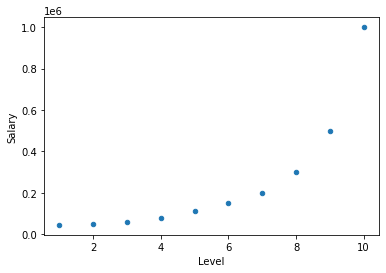

In [25]:
df.plot(kind = 'scatter', x = 'Level', y = 'Salary')
plt.show()

In [26]:
model_1 = LinearRegression()
model_1.fit(X,y)

LinearRegression()

In [27]:
df['pred_1']=model_1.predict(X)

<AxesSubplot:xlabel='Level', ylabel='Salary'>

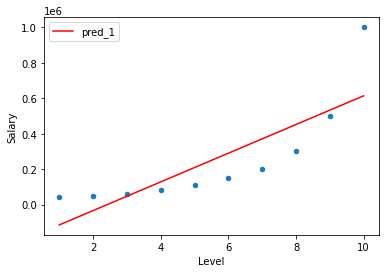

In [28]:
ax = df.plot(kind = 'scatter',x = 'Level',y='Salary')
df.plot(x = 'Level',y='pred_1',ax=ax,color='red')

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [30]:
x = df[['Level']]
y = df['Salary']

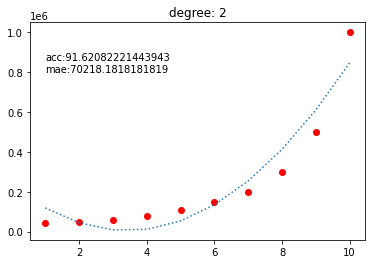

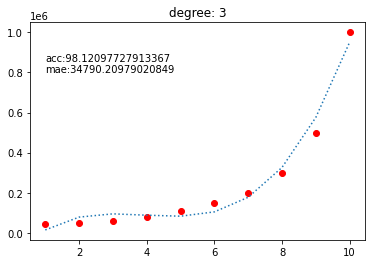

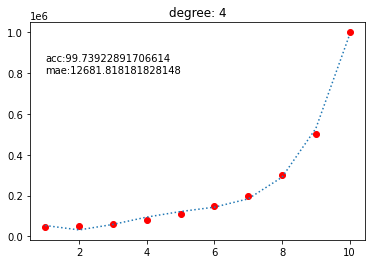

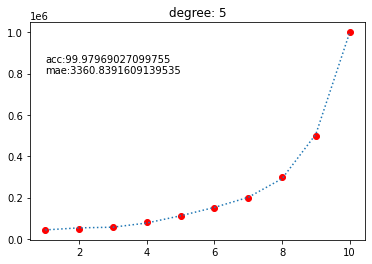

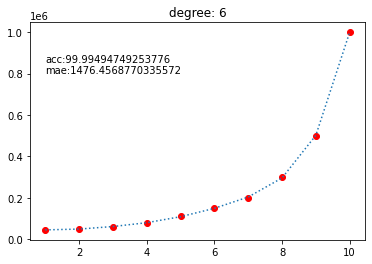

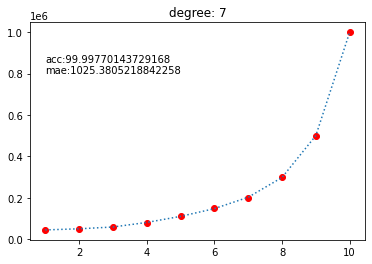

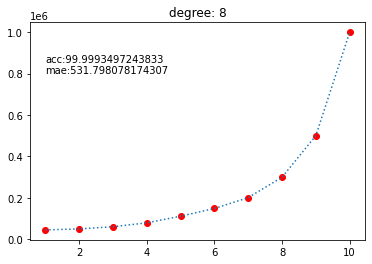

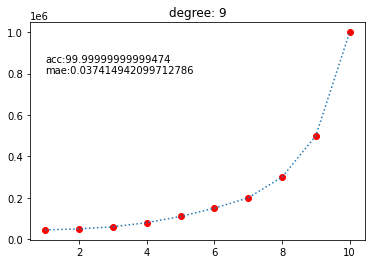

In [31]:
for i in range(2,10):
    p = PolynomialFeatures(i)
    x_new = p.fit_transform(x)
    reg = LinearRegression()
    reg.fit(x_new,y)
    ypred = reg.predict(x_new)
    acc = f"acc:{reg.score(x_new,y)* 100}"
    mae = f"mae:{mean_absolute_error(y,ypred)}"
    plt.title(f"degree: {i}")
    plt.plot(x,y,'ro',x,ypred,':')
    plt.text(1,.8e6,f"{acc}\n{mae}")
    plt.show()

In [32]:
reg = LinearRegression()
pf = PolynomialFeatures(8)
x_opt = pf.fit_transform(x)
reg.fit(x_opt,y)

LinearRegression()

In [33]:
reg.predict(pf.transform([[11]]))

C:\Users\varun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([2595499.77975493])

In [34]:
df

,Position,Level,Salary,pred_1
0,Business Analyst,1,45000,-114454.545455
1,Junior Consultant,2,50000,-33575.757576
2,Senior Consultant,3,60000,47303.030303
3,Manager,4,80000,128181.818182
4,Country Manager,5,110000,209060.606061
5,Region Manager,6,150000,289939.393939
6,Partner,7,200000,370818.181818
7,Senior Partner,8,300000,451696.969697
8,C-level,9,500000,532575.757576
9,CEO,10,1000000,613454.545455
